<a href="https://colab.research.google.com/github/ahmadshajhan/Ahmad/blob/main/math_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [134]:
import torch
from torch import nn

# Note: this notebook requires torch >= 1.10.0
torch.__version__

'2.9.0+cu128'

In [135]:
# Setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [136]:
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)

    # Download pizza, steak, sushi data
    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        print("Downloading pizza, steak, sushi data...")
        f.write(request.content)

    # Unzip pizza, steak, sushi data
    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
        print("Unzipping pizza, steak, sushi data...")
        zip_ref.extractall(image_path)

data/pizza_steak_sushi directory exists.


In [137]:
import os
def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.
  Args:
    dir_path (str or pathlib.Path): target directory

  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [138]:
# Setup train and testing paths
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

Random image path: data/pizza_steak_sushi/train/steak/1647351.jpg
Image class: steak
Image height: 512
Image width: 512


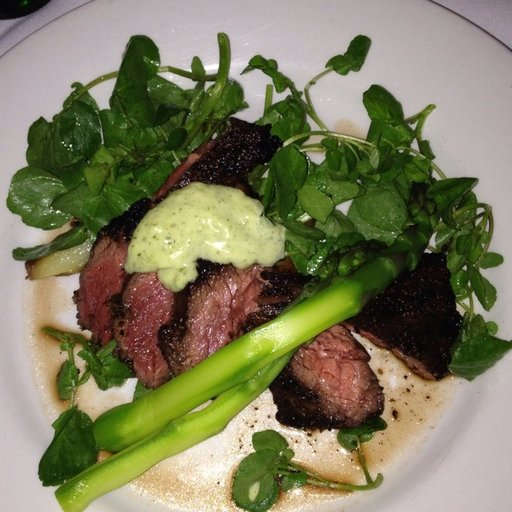

In [139]:
import random
from PIL import Image

# Set seed
# random.seed(42) # <- try changing this and see what happens

# 1. Get all image paths (* means "any combination")
image_path_list = list(image_path.glob("*/*/*.jpg"))

# 2. Get random image path
random_image_path = random.choice(image_path_list)

# 3. Get image class from path name (the image class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem

# 4. Open image
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

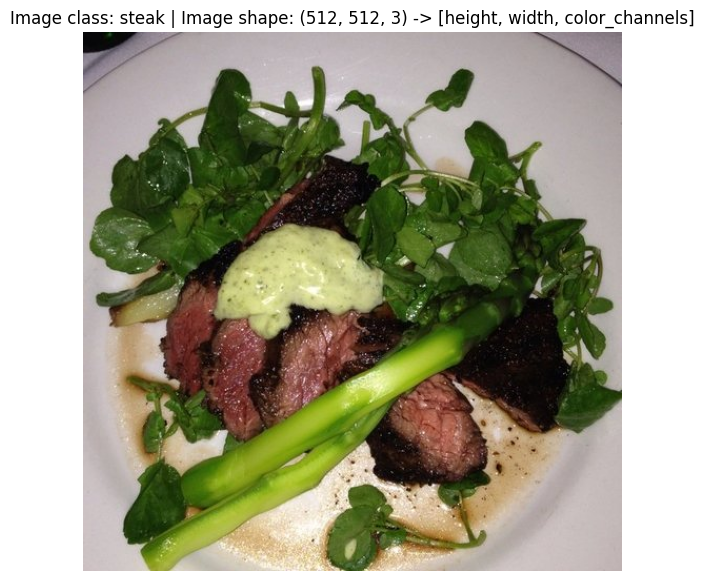

In [140]:
import numpy as np
import matplotlib.pyplot as plt

# Turn the image into an array
img_as_array = np.asarray(img)

# Plot the image with matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False);

### 3. Transforming data

In [141]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [142]:
# write a transforms for image
data_transforms = transforms.Compose([
    #Resize our images to 64x64
    transforms.Resize((64, 64)),
    # Flip the images images on the horizontal
    transforms.RandomHorizontalFlip(p=0.5), # p = probability of flip, 0.5 = 50% chance
    #Turn thge images into tensor
    transforms.ToTensor()
])

In [143]:
data_transforms(img).shape

torch.Size([3, 64, 64])

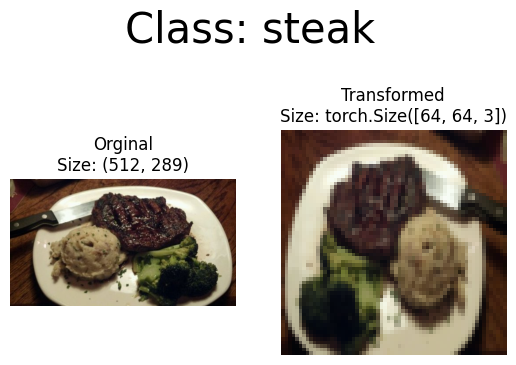

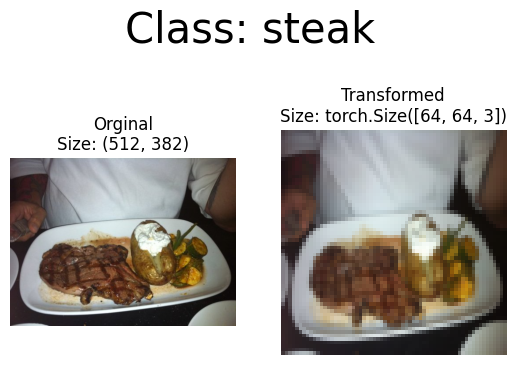

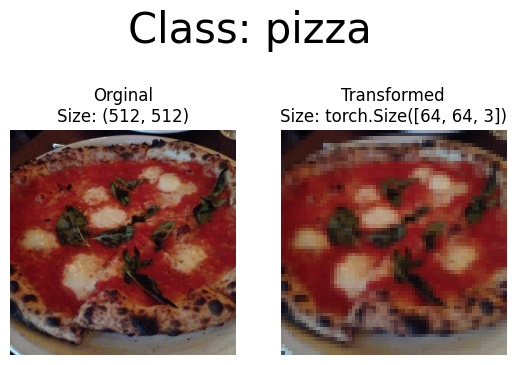

In [144]:
def plot_transformed_image(image_path, transform, n, seed):
  if seed:
    random.seed(seed)

  random_image_path = random.sample(image_path_list, k=n)

  for image_path in random_image_path:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(nrows=1, ncols=2) # Changed subplot to subplots
      ax[0].imshow(f)
      ax[0].set_title(f"Orginal\nSize: {f.size}")
      ax[0].axis(False)

      # Transform and plot the image
      transformed_image = transform(f).permute(1, 2, 0)
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformed\nSize: {transformed_image.shape}")
      ax[1].axis(False)

      fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=30)
plot_transformed_image(image_path=image_path_list, transform=data_transforms, n=3, seed=42)

### 4 .Option 1 Loading image data using `ImageFolder`

#Use Image Folder to loade Datsets

In [145]:
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transforms,
                                  target_transform=None)


test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transforms
                                 )
train_data, test_data


(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [146]:
#Get class Names ad list
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [147]:
#Get class as dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [148]:
train_data.samples[0]

('data/pizza_steak_sushi/train/pizza/1008844.jpg', 0)

In [149]:
#Index on the train data dataset
imd , lab = train_data[0][0], train_data[0][1]
imd.shape, lab

(torch.Size([3, 64, 64]), 0)

In [150]:
#Rearrange the order of Dimensions
# The 'img' variable is a PIL Image, which does not have a .permute() method.
# We will use 'imd', which is a PyTorch Tensor from the previous cell, to demonstrate permute.

print(f"Original Tensor Shape (C, H, W): {imd.shape}")

imd_permute = imd.permute(1, 2, 0)

print(f"Permuted Tensor Shape (H, W, C): {imd_permute.shape}")

Original Tensor Shape (C, H, W): torch.Size([3, 64, 64])
Permuted Tensor Shape (H, W, C): torch.Size([64, 64, 3])


Text(0.5, 1.0, 'Image Class: pizza')

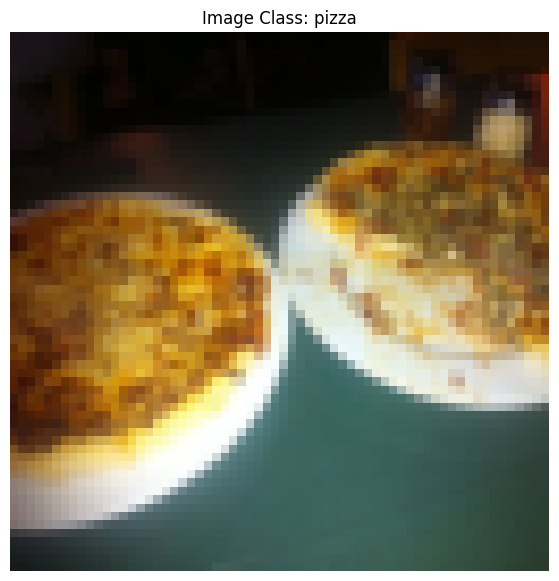

In [151]:
plt.figure(figsize=(10, 7))
plt.imshow(imd_permute)
plt.axis("off")
plt.title(f"Image Class: {class_names[lab]}")

## 4.1 Turn loaded images into DataLoaders

In [152]:
!nvidia-smi

Thu Feb 12 20:47:28 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 580.82.07              Driver Version: 580.82.07      CUDA Version: 13.0     |
+-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   64C    P0             33W /   70W |     213MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [153]:
from torch.utils.data import DataLoader
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=1,
                              num_workers=os.cpu_count(),
                              shuffle=True)
test_dataloader = DataLoader(dataset=test_data,
                             batch_size=1,
                             num_workers=os.cpu_count(),
                             shuffle=False)
len(train_dataloader), len(test_dataloader)

(225, 75)

In [154]:
img, label = next(iter(train_dataloader))

#Batch size will Be one

print(f"Image shape: {img.shape}")
print(f"Label shape: {label.shape}")


Image shape: torch.Size([1, 3, 64, 64])
Label shape: torch.Size([1])


#### 5 Loading image data with a Custime Dataset

In [155]:
import os
import pathlib
from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

In [156]:
###5.1 Creating a helper function target directory
target_directory = train_dir
print(f"Target directory: {target_directory}")

#Get the class names from the Taget Directory
class_name_found = sorted([entry.name for entry in list(os.scandir(target_directory))])
class_name_found

Target directory: data/pizza_steak_sushi/train


['pizza', 'steak', 'sushi']

In [157]:
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
  """Find the class folder name in a target directory"""
  #1 Get the target Directory
  classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())
  #2. Rise an error if class name not found
  if not classes:
    raise FileNotFoundError(f"Couldn't find any classes in {directory}.")

  #Create a directory of index labeled(computer under stand strings as lables)
  class_to_idx = {cls_name: idx for idx, cls_name in enumerate(classes)}
  return classes, class_to_idx

In [158]:
find_classes(target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

###5.2 Create custome   Dataset to replicate `ImageFolder`

In [159]:
# Write a cudtome dataset class
from torch.utils.data import Dataset
from typing import Tuple, Dict, List

#1 Subclass torch.utils.data.Dataset
class ImageFolderCustom(Dataset):
  #2. Initilize the custome dataset
  def __init__(self, target_dir: str, transform=None) -> None:
    self.paths = list(pathlib.Path(target_dir).glob("*/*.jpg"))
    self.transform = transform
    self.classes, self.class_to_idx = find_classes(target_dir)
    self.target_dir = target_dir
  def load_image(self, index: int) -> Image.Image:
    image_path = self.paths[index]
    return Image.open(image_path)
  # 5. Overwrite __len__()
  def __len__(self) -> int:
    return len(self.paths)
  #Overwrite __getitem__() gert a particulare sample
  def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
    img = self.load_image(index)
    class_name = self.paths[index].parent.name
    class_idx = self.class_to_idx[class_name]

    if self.transform:
      return self.transform(img), class_idx
    else:
      return img, class_idx


In [160]:
# Create a transform
train_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

test_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

In [161]:
# Test our image folder Custom
train_data_custom = ImageFolderCustom(target_dir=train_dir,
                                    transform=train_transforms)
test_data_custom = ImageFolderCustom(target_dir=test_dir,
                                    transform=test_transforms)
train_data_custom, test_data_custom

(<__main__.ImageFolderCustom at 0x7a2f0ed988f0>,
 <__main__.ImageFolderCustom at 0x7a2f0ea16300>)

In [162]:
len(train_data_custom), len(test_data_custom)

(225, 75)

In [163]:
train_data_custom.classes

['pizza', 'steak', 'sushi']

In [164]:
train_data_custom.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [165]:
# Check for quality between orginal image Folder and ImageFolder Custem
print(train_data_custom.classes==train_data.classes)
print(train_data_custom.class_to_idx==train_data.class_to_idx)

True
True


## 5.3 create afunction to display random images

In [166]:
#1. Craeater a function to take a dataset
def display_random_images(dataset: torch.utils.data.Dataset,
                          classes:List[str] = None,
                          n: int = None,
                          display_shape:bool = True,
                          seed:int = None):
  #2. Adjust display if n is too high
  if n > 10:
    n = 10
    display_shape = False
    print(f"For display purposes n shouldm't be large than 10 setting 10 and removing shape display")
  #3. Set the seed
  if seed:
    random.seed(seed)
  #$ Get the random samples indexex
  random_sample_idx = random.sample(range(len(dataset)), k=n)
  #5. Setup the fig
  plt.figure(figsize=(16, 8))



  #6. Loop through the random indexes
  for i, targ_sample in enumerate(random_sample_idx):
    targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]
    #7. Adjust tensor dimension for ploting
    targ_image_adjust = targ_image.permute(1, 2, 0)


    #Plot adjusted samples
    plt.subplot(1, n, i+1)
    plt.imshow(targ_image_adjust)
    if classes:
      title = f"Class: {classes[targ_label]}"
      if display_shape:
        title = title + f" | \nShape: {targ_image_adjust.shape}"
      plt.title(title)
      plt.axis(False)

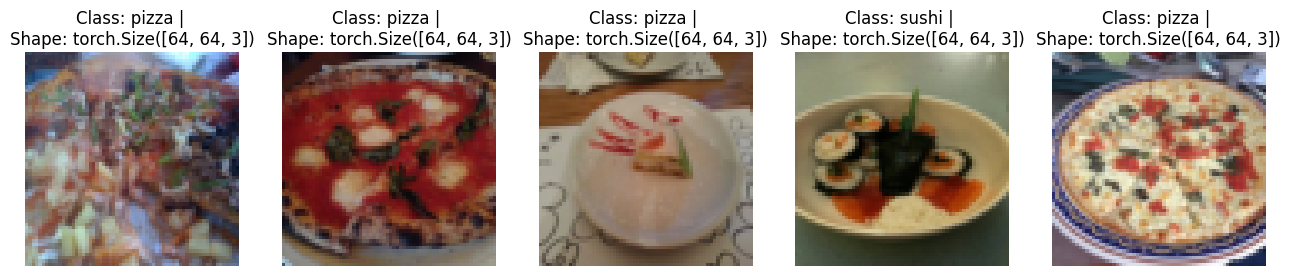

In [167]:
# Display the random images form the image folder
display_random_images(dataset=train_data,
                      classes=train_data.classes,
                      n=5,
                      seed=None)

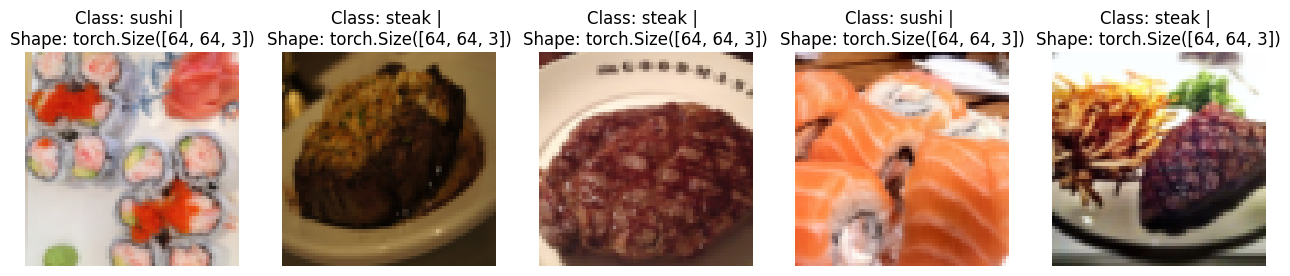

In [168]:
# Display the images from the ImageFolderCustome Dataset
display_random_images(dataset=train_data_custom,
                      n=5,
                      classes=train_data_custom.classes,
                      seed=42)

In [169]:
###5.4 Turn custome loaded images into DataLoader
from torch.utils.data import DataLoader
BATCH_SIZE = 32
num_workers = os.cpu_count()
train_dataloader_custom = DataLoader(dataset=train_data_custom,
                                     batch_size=BATCH_SIZE,
                                     num_workers=os.cpu_count(),
                                     shuffle=True)
test_dataloader_custom = DataLoader(dataset=test_data_custom,
                                     batch_size=BATCH_SIZE,
                                     num_workers=os.cpu_count(),
                                     shuffle=False)
test_dataloader_custom, train_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x7a2f0ee870b0>,
 <torch.utils.data.dataloader.DataLoader at 0x7a2f0ed9bb60>)

In [170]:
from matplotlib import image
#Get the image and label from custome dataloader
img_custom, label_custom = next(iter(train_dataloader_custom))
#Printou the shapes
img_custom.shape, label_custom.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

### 6. Other forms of transforms
* Data Augmentation is the process of artifically adding diversity to your training data

In [171]:
#Lets's look at trivial agument
from torchvision import transforms
train_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=5),
    transforms.ToTensor()
])

test_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])


In [172]:
# Get all the image path
image_path_list = list(image_path.glob("*/*/*.jpg"))
image_path_list[:10]

[PosixPath('data/pizza_steak_sushi/train/steak/2129685.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/2614649.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/256592.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/2324994.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/97656.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/1839481.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/1937872.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/3245622.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/2629750.jpg'),
 PosixPath('data/pizza_steak_sushi/train/steak/3857508.jpg')]

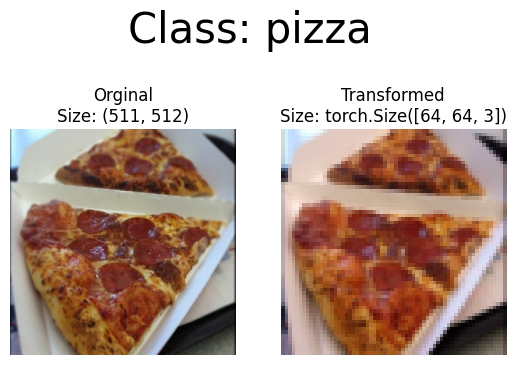

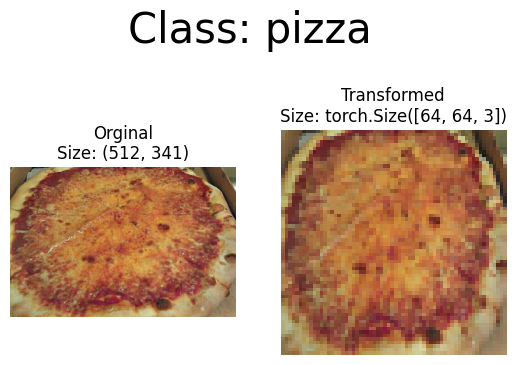

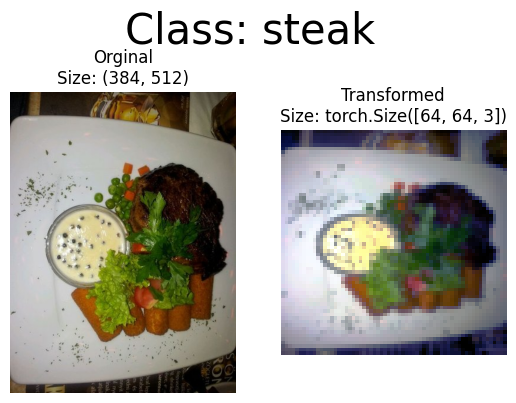

In [173]:
plot_transformed_image(
    image_path=image_path_list,
    transform=train_transform,
    n=3,
    seed=None
)

##1.0 Model 0 TinyVGG withouit Agumentation

In [174]:
# Create simple transform
simple_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

In [175]:
#1. Load and transform data
train_data_simple = datasets.ImageFolder(root=train_dir,
                                         transform=simple_transform,
                                         target_transform=None)
test_data_simple = datasets.ImageFolder(root=test_dir,
                                        transform=simple_transform)
BATCH_SIZE = 32
train_dataloader_simple = DataLoader(dataset=train_data_simple,
                                     batch_size=BATCH_SIZE,
                                     num_workers=os.cpu_count(),
                                     shuffle=True)
test_dataloader_simple = DataLoader(dataset=test_data_simple,
                                     batch_size=BATCH_SIZE,
                                     num_workers=os.cpu_count(),
                                     shuffle=False)


### 7.2 Create TinyVGG model class

In [176]:
class TinyVGG(nn.Module):
  def __init__(self, input_shape :int,
               hidden_units: int,
               output_shape: int) -> None:
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2) #defealut stride value is same as to the kenal size
    )

    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=0),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2) #defealut stride value is same as to the kenal size
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*13*13,
                  out_features=output_shape)
    )
  def forward(self, x: torch.Tensor):
    x = self.conv_block_1(x)
    x = self.conv_block_2(x)
    x = self.classifier(x)
    return x



In [177]:
torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(class_names)).to(device)
model_0


TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

##Try a forward pass one a simgle image batch

In [178]:
image_batch, label_batch = next(iter(train_dataloader_simple))
image_batch.shape, label_batch.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [179]:
model_0(image_batch.to(device))

tensor([[ 2.0795e-02, -1.9510e-03,  9.5212e-03],
        [ 1.8440e-02,  2.4669e-03,  6.6609e-03],
        [ 1.7695e-02,  1.0282e-03,  9.4975e-03],
        [ 2.4446e-02, -3.3489e-03,  9.5877e-03],
        [ 1.9939e-02,  6.9129e-04,  1.0778e-02],
        [ 2.1281e-02,  2.0434e-03,  5.0046e-03],
        [ 2.0996e-02,  1.6417e-04,  1.2481e-02],
        [ 2.1566e-02, -1.9607e-03,  9.7175e-03],
        [ 2.4500e-02, -4.7904e-03,  8.5394e-03],
        [ 2.0239e-02, -4.7980e-04,  1.0907e-02],
        [ 2.2219e-02, -4.1815e-04,  9.8173e-03],
        [ 2.2318e-02, -2.1642e-03,  9.4428e-03],
        [ 2.1851e-02, -3.7225e-03,  8.3784e-03],
        [ 2.2881e-02, -1.7559e-03,  1.0299e-02],
        [ 2.1635e-02, -4.3994e-03,  9.4990e-03],
        [ 2.2101e-02, -4.1469e-03,  9.3904e-03],
        [ 2.1226e-02, -4.4215e-03,  1.1476e-02],
        [ 2.1698e-02, -2.7458e-03,  8.4966e-03],
        [ 1.9974e-02, -3.2317e-07,  8.4496e-03],
        [ 1.8308e-02,  1.6378e-03,  8.5491e-03],
        [ 2.0768e-02

## 7.4 Torch info to get an idea of the shapes going through our model

In [180]:
try:
  import torchinfo
except:
  !pip install torchinfo
  import torchinfo
from torchinfo import summary
summary(model_0, input_size=[32, 3, 64, 64])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [32, 3]                   --
├─Sequential: 1-1                        [32, 10, 30, 30]          --
│    └─Conv2d: 2-1                       [32, 10, 62, 62]          280
│    └─ReLU: 2-2                         [32, 10, 62, 62]          --
│    └─Conv2d: 2-3                       [32, 10, 60, 60]          910
│    └─ReLU: 2-4                         [32, 10, 60, 60]          --
│    └─MaxPool2d: 2-5                    [32, 10, 30, 30]          --
├─Sequential: 1-2                        [32, 10, 13, 13]          --
│    └─Conv2d: 2-6                       [32, 10, 28, 28]          910
│    └─ReLU: 2-7                         [32, 10, 28, 28]          --
│    └─Conv2d: 2-8                       [32, 10, 26, 26]          910
│    └─ReLU: 2-9                         [32, 10, 26, 26]          --
│    └─MaxPool2d: 2-10                   [32, 10, 13, 13]          --
├─Sequentia

## CReate a train and test loop functions

In [181]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer:torch.optim.Optimizer,
               device = device):
  model.train()

  train_loss , train_acc = 0, 0
  for batch, (X, y) in enumerate(dataloader):
    X, y = X.to(device), y.to(device)
    y_pred = model(X) # output model logits
    loss = loss_fn(y_pred, y)
    train_loss += loss.item()
    optimizer.zero_grad()
    loss.backward()

    optimizer.step()

    #Calculate the acc
    y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
    train_acc = (y_pred_class == y).sum().item()/len(y_pred)
  #Adjust matrics to get the lower accuracy pet batch
  train_loss = train_loss / len(dataloader)
  train_acc = train_acc / len(dataloader)
  return train_loss, train_acc

In [182]:
import torch

#Create a test step
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn:torch.nn.Module,
              device = device):
  model.eval()
  test_loss, test_acc = 0, 0
  with torch.inference_mode():
    for batch, (X, y) in enumerate(dataloader):
      # Send data to target device
      X, y = X.to(device), y.to(device)
      #1. Forward pass
      test_pred = model(X)
      loss = loss_fn(test_pred, y)
      test_loss += loss.item()
      #Calculate the accuray
      test_pred_labels = test_pred.argmax(dim=1)
      test_acc += ((test_pred_labels == y).sum().item()/len(y))
  #Adjust matrics
  test_loss = test_loss / len(dataloader)
  test_acc = test_acc / len(dataloader)
  return test_loss, test_acc

###7.6 Craeating a `train` function to combine  `train_step()` and `test_step()`

In [183]:
from tqdm.auto import tqdm

def train(model: torch.nn.Module,
          train_data:torch.utils.data.DataLoader,
          test_dataloader:torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5,
          device: torch.device = device):
  results = {"train_loss": [],
             "test_loss": [],
             "train_acc": [],
             "test_acc": []}
  for epoch in tqdm(range(epochs)):
    train_loss, train_acc = train_step(model=model,
                                        dataloader=train_dataloader,
                                        loss_fn=loss_fn,
                                       optimizer=optimizer,
                                       device=device)
    test_loss, test_acc = test_step(model=model,
                                    dataloader=test_dataloader,
                                    loss_fn=loss_fn,
                                    device=device)
    print(f"Epoches: {epoch} |Train loss: {train_loss} |Train acc: {train_acc:.2f} |Test loss: {test_loss} |Test acc: {test_acc}")

    results["train_loss"].append(train_loss)
    results["test_loss"].append(test_loss)
    results["train_acc"].append(train_acc)
    results["test_acc"].append(test_acc)

  return results

### 7.7 Train and eval the MOdel 0

In [184]:
from IPython.paths import ensure_dir_exists
# Set the random seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#Set number of epoches'
NUM_EPOCHES = 5

# Recreate an instance of TinyVGG
model_0 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)

#set up the loss function
loss_fn = nn.CrossEntropyLoss()

#Set up the optimizer
optimizer = torch.optim.Adam(params=model_0.parameters(),
                             lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

 #Train model_0
model_0_result = train(model=model_0,
                         train_data=train_dataloader_simple,
                         test_dataloader=test_dataloader_simple,
                         optimizer=optimizer,
                         loss_fn=loss_fn,
                         epochs=NUM_EPOCHES,
                         device=device)

#End the timer
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")


  0%|          | 0/5 [00:00<?, ?it/s]

Epoches: 0 |Train loss: 1.101754039393531 |Train acc: 0.00 |Test loss: 1.095639665921529 |Test acc: 0.3333333333333333
Epoches: 1 |Train loss: 1.041165472600195 |Train acc: 0.00 |Test loss: 1.041199803352356 |Test acc: 0.4744318181818182
Epoches: 2 |Train loss: 1.0120704673230647 |Train acc: 0.00 |Test loss: 0.9953954021135966 |Test acc: 0.555871212121212
Epoches: 3 |Train loss: 0.947198994004478 |Train acc: 0.00 |Test loss: 1.0189728140830994 |Test acc: 0.393939393939394
Epoches: 4 |Train loss: 0.9428736978024245 |Train acc: 0.00 |Test loss: 0.9609736402829488 |Test acc: 0.5861742424242424
Total training time: 8.254 seconds


In [185]:
model_0_result

{'train_loss': [1.101754039393531,
  1.041165472600195,
  1.0120704673230647,
  0.947198994004478,
  0.9428736978024245],
 'test_loss': [1.095639665921529,
  1.041199803352356,
  0.9953954021135966,
  1.0189728140830994,
  0.9609736402829488],
 'train_acc': [0.0,
  0.0044444444444444444,
  0.0044444444444444444,
  0.0044444444444444444,
  0.0],
 'test_acc': [0.3333333333333333,
  0.4744318181818182,
  0.555871212121212,
  0.393939393939394,
  0.5861742424242424]}

### 7.8 Plot the loss curves of the modfel_0

In [186]:
# Get the model_0_results keys
model_0_result.keys()

dict_keys(['train_loss', 'test_loss', 'train_acc', 'test_acc'])

In [187]:
from modulefinder import test
def plot_loss_curve(results: Dict[str, List[float]]):
  loss = results["train_loss"]
  test_loss = results["test_loss"]
  accuracy = results["train_acc"]
  test_accuracy = results["test_acc"]
  epochs = range(len(results["train_loss"]))
  plt.figure(figsize=(15, 7))

  plt.subplot(1, 2, 1)
  plt.plot(epochs, loss, label="train_loss")
  plt.plot(epochs, test_loss, label="test_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()
  plt.subplot(1, 2, 2)
  plt.plot(epochs, accuracy, label="train_accuracy")
  plt.plot(epochs,test_accuracy, label="test_accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend();

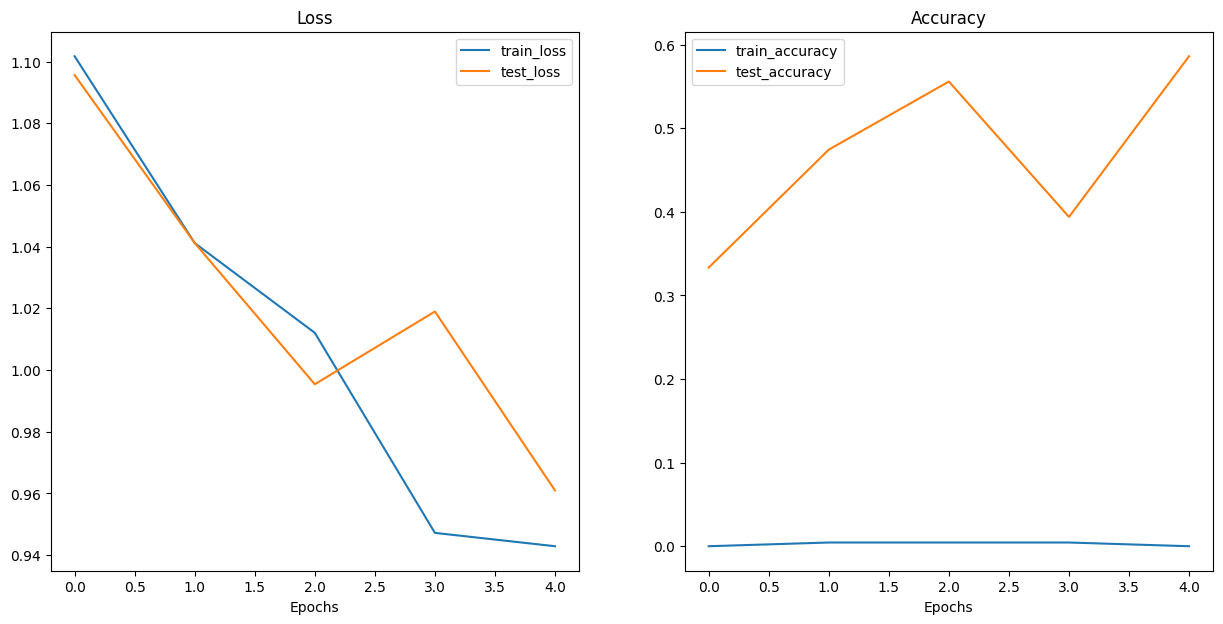

In [188]:
plot_loss_curve(model_0_result)

### 8. What should an idel loss curve look like?

key not overfitting: https://aws.amazon.com/what-is/overfitting/

## 9. Model 1: TinyVGG data Agumentation

### 9.1 Create transform with data Agumentation


In [189]:
#Create traning transforms with TrivialAgumentation
from torchvision import transforms
train_transform_aug = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

test_transforms_simple = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])


### 9.2 Create train and test Datasets and DataLoaders with data agumentation

In [190]:
# Turn our image folders into Datasets
train_data_aug = datasets.ImageFolder(root=train_dir,
                                       transform=train_transform_aug,
                                       target_transform=None)
test_data_aug = datasets.ImageFolder(root=test_dir,
                                     transform=test_transforms_simple
                                     )

In [191]:
# Turn our Datasets into DataLoaders
import os
BATCH_SIZE = 32
NUM_WORKS = os.cpu_count()
torch.manual_seed(42)
torch.cuda.manual_seed(42)
train_dataloader_aug = DataLoader(dataset=train_data_aug,
                                  batch_size=BATCH_SIZE,
                                  num_workers=NUM_WORKS,
                                  shuffle=True)
test_dataloader_aug = DataLoader(dataset=test_data_aug,
                                 batch_size=BATCH_SIZE,
                                 num_workers=NUM_WORKS,
                                 shuffle=False)


### 9.3 Construct and train model_1

In [192]:
# Create model_1 and send to target devivce
torch.manual_seed(42)
torch.cuda.manual_seed(42)
model_1 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(train_data_aug.classes)).to(device)
model_1

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

In [193]:
# Set the random seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

NUM_EPOCHES = 5

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(),
                             lr=0.001)

from timeit import default_timer as Timer
start_time = timer()

model_1_results = train(model=model_1,
                         train_data=train_dataloader_aug,
                         test_dataloader=test_dataloader_aug,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHES,
                        device=device)
end_time = timer()
print(f"Total traning time for model_1: {end_time - start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoches: 0 |Train loss: 1.1040780411826239 |Train acc: 0.00 |Test loss: 1.0936495860417683 |Test acc: 0.28125
Epoches: 1 |Train loss: 1.0252767581409878 |Train acc: 0.00 |Test loss: 1.1570011377334595 |Test acc: 0.3229166666666667
Epoches: 2 |Train loss: 0.9623500559065077 |Train acc: 0.00 |Test loss: 0.9750090638796488 |Test acc: 0.4545454545454546
Epoches: 3 |Train loss: 0.969747720890575 |Train acc: 0.00 |Test loss: 0.99798184633255 |Test acc: 0.4441287878787879
Epoches: 4 |Train loss: 0.9030168894430002 |Train acc: 0.00 |Test loss: 0.9795514742533366 |Test acc: 0.5056818181818182
Total traning time for model_1: 8.196 seconds


In [194]:
model_1_results

{'train_loss': [1.1040780411826239,
  1.0252767581409878,
  0.9623500559065077,
  0.969747720890575,
  0.9030168894430002],
 'test_loss': [1.0936495860417683,
  1.1570011377334595,
  0.9750090638796488,
  0.99798184633255,
  0.9795514742533366],
 'train_acc': [0.0,
  0.0044444444444444444,
  0.0044444444444444444,
  0.0,
  0.0044444444444444444],
 'test_acc': [0.28125,
  0.3229166666666667,
  0.4545454545454546,
  0.4441287878787879,
  0.5056818181818182]}

### 9.4 Plot the loss curve of model 1

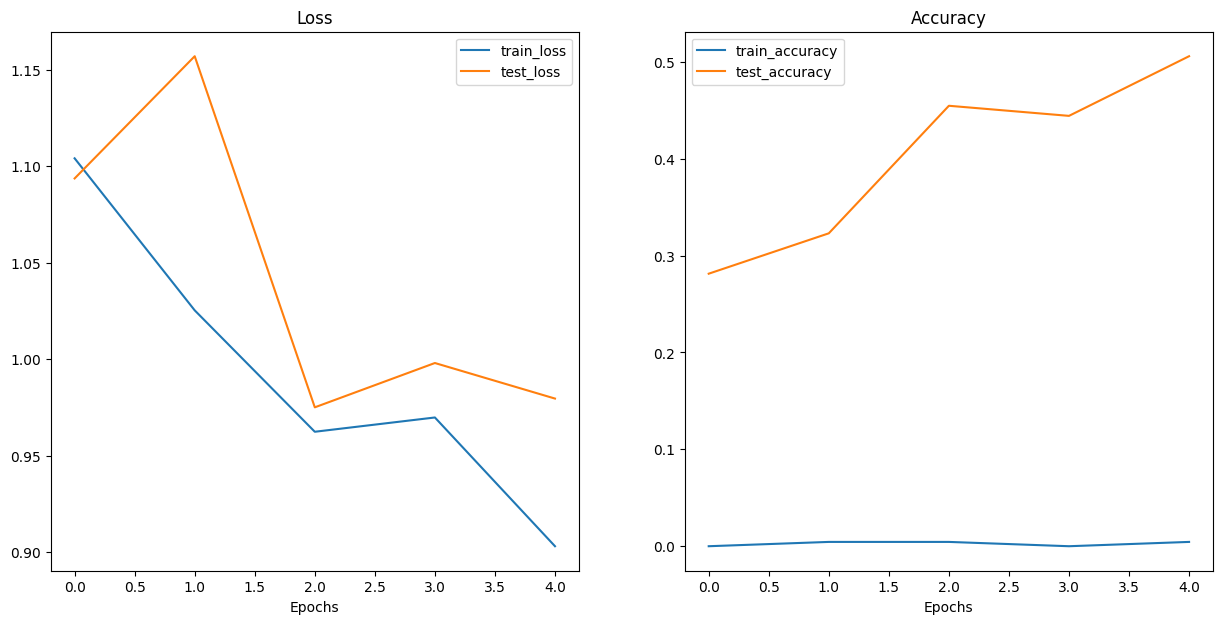

In [195]:
plot_loss_curve(model_1_results)

##10. Compare the model results

In [196]:
import pandas
model_0_df = pandas.DataFrame(model_0_result)
model_1_df = pandas.DataFrame(model_1_results)
model_0_df

,train_loss,test_loss,train_acc,test_acc
0,1.101754,1.095640,0.000000,0.333333
1,1.041165,1.041200,0.004444,0.474432
2,1.012070,0.995395,0.004444,0.555871
3,0.947199,1.018973,0.004444,0.393939
4,0.942874,0.960974,0.000000,0.586174


In [197]:
model_1_df

,train_loss,test_loss,train_acc,test_acc
0,1.104078,1.093650,0.000000,0.281250
1,1.025277,1.157001,0.004444,0.322917
2,0.962350,0.975009,0.004444,0.454545
3,0.969748,0.997982,0.000000,0.444129
4,0.903017,0.979551,0.004444,0.505682


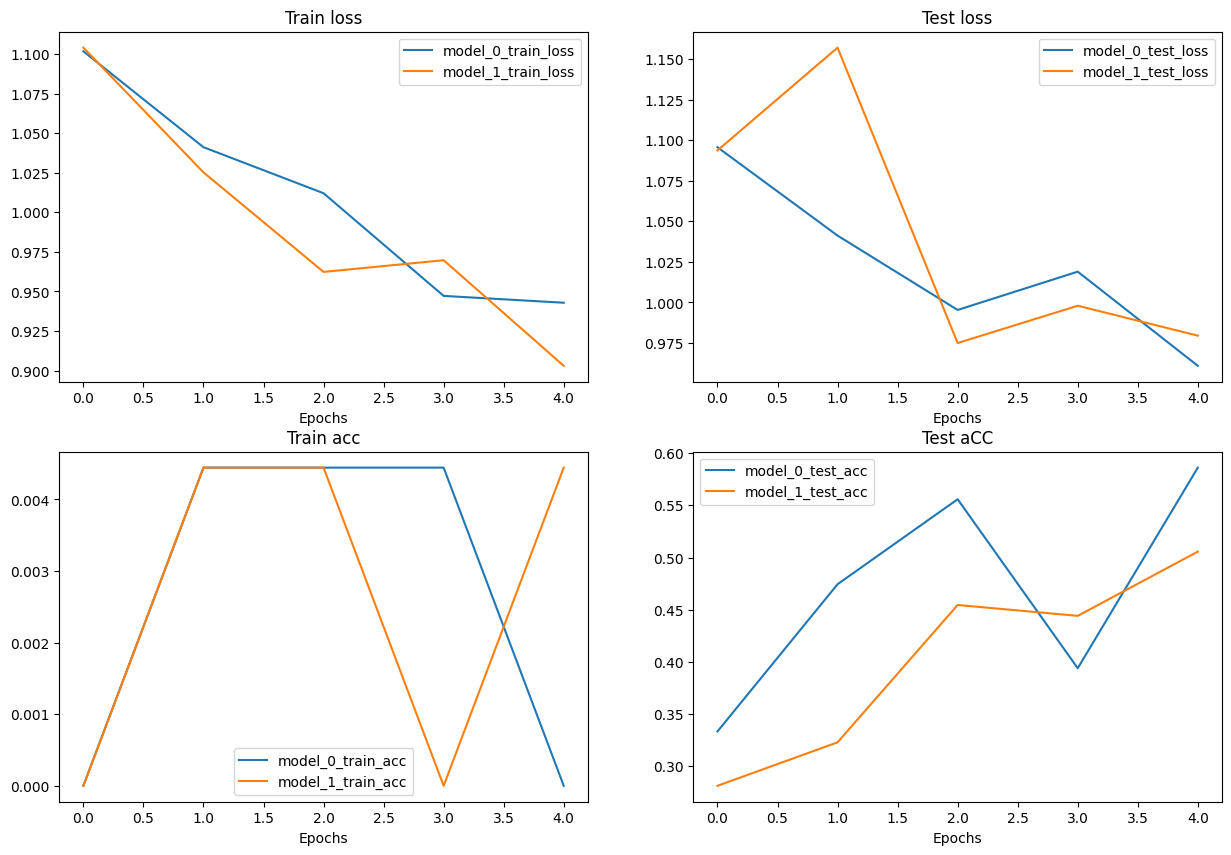

In [198]:
#Set up the ploat
plt.figure(figsize=(15, 10))
epochs = range(len(model_0_df))

plt.subplot(2, 2, 1)
plt.plot(epochs, model_0_df["train_loss"], label="model_0_train_loss")
plt.plot(epochs, model_1_df["train_loss"], label="model_1_train_loss")
plt.title("Train loss")
plt.xlabel("Epochs")
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(epochs, model_0_df["test_loss"], label="model_0_test_loss")
plt.plot(epochs, model_1_df["test_loss"], label="model_1_test_loss")
plt.title("Test loss")
plt.xlabel("Epochs")
plt.legend()


plt.subplot(2, 2, 3)
plt.plot(epochs, model_0_df["train_acc"], label="model_0_train_acc")
plt.plot(epochs, model_1_df["train_acc"], label="model_1_train_acc")
plt.title("Train acc")
plt.xlabel("Epochs")
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(epochs, model_0_df["test_acc"], label="model_0_test_acc")
plt.plot(epochs, model_1_df["test_acc"], label="model_1_test_acc")
plt.title("Test aCC")
plt.xlabel("Epochs")
plt.legend()

## 11. MAKING A PREDICTION ON A COSTEM IMAGE

In [199]:
# Download a costume image
import requests

coustom_image_path = data_path / "04-pizza-man.jpeg"

if not coustom_image_path.is_file():
    with open(coustom_image_path, "wb") as f:
      request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/blob/main/images/04-pizza-dad.jpeg?raw=true")
      print(f"Downloading {coustom_image_path}...")
      f.write(request.content)
else:
  print(f"{coustom_image_path} already exists")

data/04-pizza-man.jpeg already exists


### 11.1 Loading a custom image image with pytorch

In [203]:
import torchvision
custom_image_uint8 = torchvision.io.read_image(str(coustom_image_path))
print(f"Custom image shape: {custom_image_uint8.shape}")
print(f"Custom image dtype: {custom_image_uint8.dtype}")
print(f"Custom image device: {custom_image_uint8.device}")
print(f"Custom image tensor: {custom_image_uint8}")

Custom image shape: torch.Size([3, 4032, 3024])
Custom image dtype: torch.uint8
Custom image device: cpu
Custom image tensor: tensor([[[154, 173, 181,  ...,  21,  18,  14],
         [146, 165, 181,  ...,  21,  18,  15],
         [124, 146, 172,  ...,  18,  17,  15],
         ...,
         [ 72,  59,  45,  ..., 152, 150, 148],
         [ 64,  55,  41,  ..., 150, 147, 144],
         [ 64,  60,  46,  ..., 149, 146, 143]],

        [[171, 190, 193,  ...,  22,  19,  15],
         [163, 182, 193,  ...,  22,  19,  16],
         [141, 163, 184,  ...,  19,  18,  16],
         ...,
         [ 55,  42,  28,  ..., 107, 104, 103],
         [ 47,  38,  24,  ..., 108, 104, 102],
         [ 47,  43,  29,  ..., 107, 104, 101]],

        [[119, 138, 147,  ...,  17,  14,  10],
         [111, 130, 145,  ...,  17,  14,  11],
         [ 87, 111, 136,  ...,  14,  13,  11],
         ...,
         [ 35,  22,   8,  ...,  52,  52,  48],
         [ 27,  18,   4,  ...,  50,  49,  44],
         [ 27,  23,   9,  ...

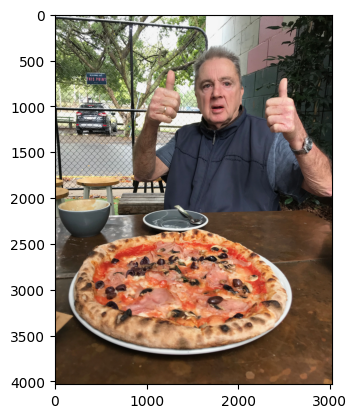

In [202]:
plt.imshow(custom_image_uint8.permute(1, 2, 0))

###11.2 Make predections on a custome image with a trained PyTorch Model

In [209]:
custom_image = torchvision.io.read_image(str(coustom_image_path)).type(torch.float32) / 255.
print(f"Shape: {custom_image.shape}")
print(f"Tensor: {custom_image}")

Shape: torch.Size([3, 4032, 3024])
Tensor: tensor([[[0.6039, 0.6784, 0.7098,  ..., 0.0824, 0.0706, 0.0549],
         [0.5725, 0.6471, 0.7098,  ..., 0.0824, 0.0706, 0.0588],
         [0.4863, 0.5725, 0.6745,  ..., 0.0706, 0.0667, 0.0588],
         ...,
         [0.2824, 0.2314, 0.1765,  ..., 0.5961, 0.5882, 0.5804],
         [0.2510, 0.2157, 0.1608,  ..., 0.5882, 0.5765, 0.5647],
         [0.2510, 0.2353, 0.1804,  ..., 0.5843, 0.5725, 0.5608]],

        [[0.6706, 0.7451, 0.7569,  ..., 0.0863, 0.0745, 0.0588],
         [0.6392, 0.7137, 0.7569,  ..., 0.0863, 0.0745, 0.0627],
         [0.5529, 0.6392, 0.7216,  ..., 0.0745, 0.0706, 0.0627],
         ...,
         [0.2157, 0.1647, 0.1098,  ..., 0.4196, 0.4078, 0.4039],
         [0.1843, 0.1490, 0.0941,  ..., 0.4235, 0.4078, 0.4000],
         [0.1843, 0.1686, 0.1137,  ..., 0.4196, 0.4078, 0.3961]],

        [[0.4667, 0.5412, 0.5765,  ..., 0.0667, 0.0549, 0.0392],
         [0.4353, 0.5098, 0.5686,  ..., 0.0667, 0.0549, 0.0431],
         [0.341

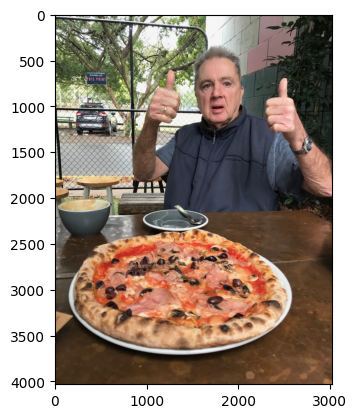

In [210]:
plt.imshow(custom_image.permute(1, 2, 0))

In [206]:
# Try to  amke a prediction on a image in uint8 format
model_1.eval()
with torch.inference_mode():
  model_1(custom_image.to(device))

RuntimeError: mat1 and mat2 shapes cannot be multiplied (10x756765 and 1690x3)

In [212]:
# Create transfrom pipeline to ReSize the image
custom_imahe_transform = transforms.Compose([
    transforms.Resize((64, 64))
])

custom_image_transformed = custom_imahe_transform(custom_image)

In [214]:
custom_image_transformed.shape

torch.Size([3, 64, 64])

In [215]:
print(f"Orginal shape: {custom_image.shape}")
print(f"Transformed shape: {custom_image_transformed.shape}")

Orginal shape: torch.Size([3, 4032, 3024])
Transformed shape: torch.Size([3, 64, 64])


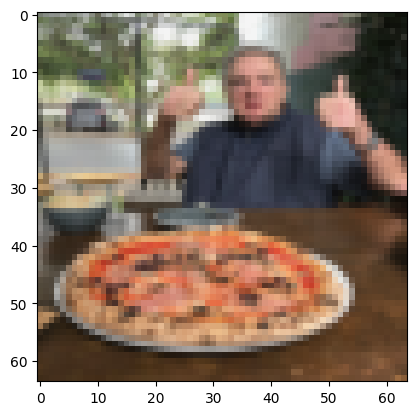

In [216]:
plt.imshow(custom_image_transformed.permute(1, 2, 0))

In [217]:
#This will error: no batch size

model_1.eval()
with torch.inference_mode():
  custom_image_pred = model_1(custom_image_transformed.to(device))
custom_image_pred

RuntimeError: mat1 and mat2 shapes cannot be multiplied (10x169 and 1690x3)

In [220]:
model_1.eval()
with torch.inference_mode():
  custom_image_pred = model_1(custom_image_transformed.to(device))
custom_image_pred

tensor([[ 0.3704, -0.4756, -0.0959]], device='cuda:0')

In [221]:
# Covert the logits into prediction probablities
custom_image_pred_probs = torch.softmax(custom_image_pred, dim=1)
custom_image_pred_probs

tensor([[0.4863, 0.2087, 0.3051]], device='cuda:0')

In [223]:
# Covert the prediction probs to pred labels
custom_image_pred_labels = torch.argmax(custom_image_pred_probs, dim=1).cpu()
custom_image_pred_labels

tensor([0])

In [225]:
class_names[custom_image_pred_labels]

'pizza'

### 11.3 Putting custom image prediction togither: Building a function

In [228]:
def pred_and_plot(model: torch.nn.Module,
                  image_path: str,
                  class_name: List[str] = None,
                  transform=None,
                  device=device):
  #Load in the image
  target_image = torchvision.io.read_image(str(image_path)).type(torch.float32)

  target_image = target_image / 255.
  #Transform the image
  if transform:
    target_image = transform(target_image)
  #Make sure the model is on the target device
  model.to(device)

  #Turn on eval/inference mode and make a prediction

  model.eval()

  with torch.inference_mode():
    target_image = target_image.unsqueeze(0)

    target_image_pred = model(target_image.to(device))
  #Covert the logits to prediction probablities
  target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

  #Covert the image into Prediction labels
  target_image_pred_labels = torch.argmax(target_image_pred_probs, dim=1)

  #Plot the image alonside  the prdiction and prediction probablities
  plt.imshow(target_image.squeeze().permute(1, 2, 0))
  if class_names:
    plt.title(f"Pred: {class_names[target_image_pred_labels.cpu()]} | Prob: {target_image_pred_probs.max().cpu():.3f}")
  else :
    title = f"Pred: {target_image_pred_labels.cpu()} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    plt.title(title)
  plt.axis(False)

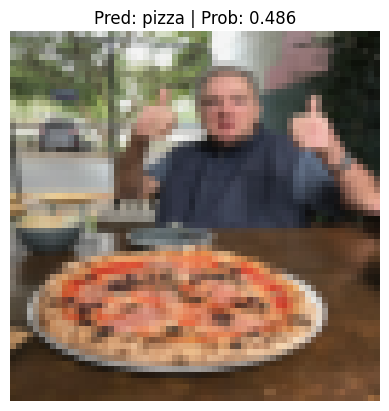

In [232]:
#Pred on our custom image
pred_and_plot(model=model_1,
              image_path=coustom_image_path,
              class_name=class_names,
              transform=custom_imahe_transform,
              device=device)
#

In [ ]:
|